In [31]:
import numpy as np
import tensorflow as tf
import pathlib
import PIL

import os
import matplotlib.pyplot as plt

In [2]:
dataset_url = 'http://download.tensorflow.org/example_images/flower_photos.tgz'

archive = tf.keras.utils.get_file(origin=dataset_url, extract=True) #, cache_dir=)
data_dir = pathlib.Path(archive).with_suffix('')

In [3]:
data_dir

WindowsPath('C:/Users/Mehdi.Omidshafiee/.keras/datasets/flower_photos')

In [4]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

3670

In [5]:
roses = list(data_dir.glob('roses/*.jpg'))
roses[1]

WindowsPath('C:/Users/Mehdi.Omidshafiee/.keras/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg')

In [6]:
str(roses[1])

'C:\\Users\\Mehdi.Omidshafiee\\.keras\\datasets\\flower_photos\\roses\\102501987_3cdb8e5394_n.jpg'

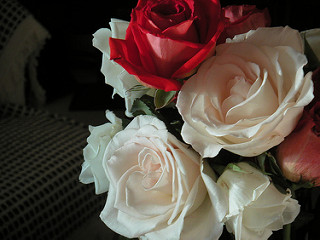

In [7]:
PIL.Image.open(str(roses[1]))

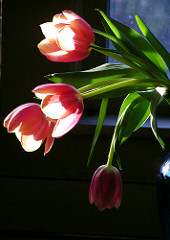

In [8]:
tulips = list(data_dir.glob('tulips/*.jpg'))
PIL.Image.open(str(tulips[20]))

## TF Data
**is a numpy independent tool to load images as tensorflow data type**

In [9]:
# Load all image file addresses but NOT any image it self
# if shuffle was true, then each data batch (iteration) shuffles too
list_ds = tf.data.Dataset.list_files(str(data_dir/'*/*'), shuffle=False) 

# Now shuffle data and keep each iteration without shuffle
list_ds = list_ds.shuffle(image_count, reshuffle_each_iteration=False)

In [10]:
next(iter(list_ds)) #.numpy()

<tf.Tensor: shape=(), dtype=string, numpy=b'C:\\Users\\Mehdi.Omidshafiee\\.keras\\datasets\\flower_photos\\tulips\\13197345653_0f685b3c97_n.jpg'>

In [11]:
for item in list_ds.take(5):
    print(item.numpy())

b'C:\\Users\\Mehdi.Omidshafiee\\.keras\\datasets\\flower_photos\\tulips\\13197345653_0f685b3c97_n.jpg'
b'C:\\Users\\Mehdi.Omidshafiee\\.keras\\datasets\\flower_photos\\daisy\\7320089276_87b544e341.jpg'
b'C:\\Users\\Mehdi.Omidshafiee\\.keras\\datasets\\flower_photos\\sunflowers\\2706304885_4916102704_n.jpg'
b'C:\\Users\\Mehdi.Omidshafiee\\.keras\\datasets\\flower_photos\\daisy\\3506866918_61dd5fc53b_n.jpg'
b'C:\\Users\\Mehdi.Omidshafiee\\.keras\\datasets\\flower_photos\\tulips\\14087326141_1906d5a373_n.jpg'


In [12]:
for item in data_dir.glob('*'):
    print(item)

C:\Users\Mehdi.Omidshafiee\.keras\datasets\flower_photos\daisy
C:\Users\Mehdi.Omidshafiee\.keras\datasets\flower_photos\dandelion
C:\Users\Mehdi.Omidshafiee\.keras\datasets\flower_photos\LICENSE.txt
C:\Users\Mehdi.Omidshafiee\.keras\datasets\flower_photos\roses
C:\Users\Mehdi.Omidshafiee\.keras\datasets\flower_photos\sunflowers
C:\Users\Mehdi.Omidshafiee\.keras\datasets\flower_photos\tulips


In [13]:
# Reterive class names to allocate labels into images
class_names = np.array(sorted([item.name for item in data_dir.glob('*') if item.name != 'LICENSE.txt']))
print(class_names)

['daisy' 'dandelion' 'roses' 'sunflowers' 'tulips']


In [14]:
# Split data for train and validation
validation_size = int(image_count * 0.2)
print('train size: ', image_count - validation_size)
print('validation size: ', validation_size)


train size:  2936
validation size:  734


In [15]:
train_dataset = list_ds.skip(validation_size)
validation_dataset = list_ds.take(validation_size)

In [16]:
print(tf.data.experimental.cardinality(train_dataset).numpy())
print(tf.data.experimental.cardinality(validation_dataset).numpy())

2936
734


In [17]:
test_path = 'C:\\Users\\Mehdi.Omidshafiee\\.keras\\datasets\\flower_photos\\roses\\5492988531_574cdc2bf0_n.jpg'
# part_test = tf.strings.split(next(iter(list_ds)).numpy(), os.path.sep)
part_test = tf.strings.split(test_path, os.path.sep)
part_test

<tf.Tensor: shape=(8,), dtype=string, numpy=
array([b'C:', b'Users', b'Mehdi.Omidshafiee', b'.keras', b'datasets',
       b'flower_photos', b'roses', b'5492988531_574cdc2bf0_n.jpg'],
      dtype=object)>

In [18]:
one_hot = part_test[-2] == class_names
print(one_hot)
print(tf.argmax(one_hot))

tf.Tensor([False False  True False False], shape=(5,), dtype=bool)
tf.Tensor(2, shape=(), dtype=int64)


In [19]:
# A function to create a tuple of (image, lable)
# NOTE: all data types must be in tensorflow NOT numpy

def get_label(file_path):
    # convert path into list of path elements
    parts = tf.strings.split(file_path, os.path.sep)
    
    # get class directory name 
    one_hot = parts[-2] == class_names

    # Integer encode the label
    return tf.argmax(one_hot)

In [20]:
batch_size=32
img_height = 180
img_width = 180


In [21]:
def decode_image(image):
    # convers the compressed string into a 3D unit8 tensor
    img = tf.io.decode_jpeg(image, channels=3)

    # or
    # img = tf.image.decode_image(image, expand_animations=False)

    # Resize the image to the desired size
    return tf.image.resize(img, [img_height, img_width])


In [22]:
def process_path(file_path):
    label = get_label(file_path)

    # load the raw data from the file as a string
    img = tf.io.read_file(filename=file_path)
    img = decode_image(img)
    
    return img, label

In [23]:
# Eager execution: returns numpy equvalant of tensor values
process_path(test_path)

(<tf.Tensor: shape=(180, 180, 3), dtype=float32, numpy=
 array([[[25.157408 , 17.657408 , 15.490741 ],
         [26.5      , 19.       , 16.833334 ],
         [23.935184 , 16.435184 , 14.268518 ],
         ...,
         [44.286922 , 37.45364  , 29.398066 ],
         [32.83327  , 29.666616 , 22.333303 ],
         [23.509241 , 21.73147  , 16.73147  ]],
 
        [[23.805555 , 18.805555 , 15.805555 ],
         [23.916668 , 18.916668 , 15.916667 ],
         [23.5      , 18.5      , 15.5      ],
         ...,
         [42.722137 , 35.888855 , 27.833282 ],
         [32.99994  , 29.833282 , 22.49997  ],
         [21.222198 , 19.444427 , 14.4444275]],
 
        [[22.777777 , 17.777777 , 14.777777 ],
         [21.333332 , 16.333332 , 13.333333 ],
         [23.064816 , 18.064816 , 15.0648155],
         ...,
         [43.51842  , 36.68514  , 28.629568 ],
         [33.166607 , 29.999949 , 22.666636 ],
         [21.620346 , 19.842575 , 14.842575 ]],
 
        ...,
 
        [[14.981493 , 13.81482  

In [24]:
AUTOTUNE = tf.data.AUTOTUNE

In [25]:
# Create data ETL pipeline (e.g. like spark)
# maps file name on pre process path
# num_parallel_calls, activates paralle loading/processing to work on multiple images

train_dataset = train_dataset.map(process_path, num_parallel_calls=AUTOTUNE)
validation_dataset = validation_dataset.map(process_path, num_parallel_calls=AUTOTUNE)


In [26]:
for image, label in train_dataset.take(10):
    print('image shape:', image.numpy().shape, end=", ")
    print('image label:', label.numpy())


image shape: (180, 180, 3), image label: 2
image shape: (180, 180, 3), image label: 0
image shape: (180, 180, 3), image label: 0
image shape: (180, 180, 3), image label: 3
image shape: (180, 180, 3), image label: 1
image shape: (180, 180, 3), image label: 4
image shape: (180, 180, 3), image label: 1
image shape: (180, 180, 3), image label: 2
image shape: (180, 180, 3), image label: 3
image shape: (180, 180, 3), image label: 3


In [27]:
a, b = next(iter(train_dataset)) #.numpy()
print(a.shape)
print(b.numpy())

(180, 180, 3)
2


-------------------
## Some tuning for performance

In [28]:
def configure_for_performance(ds):
    ds = ds.cache()
    ds = ds.shuffle(buffer_size=1000)
    ds = ds.batch(batch_size)
    # Pipeline to load data by cpu and process data with GPU
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds


In [29]:
train_dataset = configure_for_performance(train_dataset)
validation_dataset = configure_for_performance(validation_dataset)


In [30]:
a, b = next(iter(train_dataset)) #.numpy()
print(a.shape)
print(b.numpy())

(32, 180, 180, 3)
[2 3 0 3 3 3 4 1 1 1 3 4 1 4 3 1 2 3 0 2 1 0 2 4 1 1 2 4 2 3 0 2]


## Visualize data

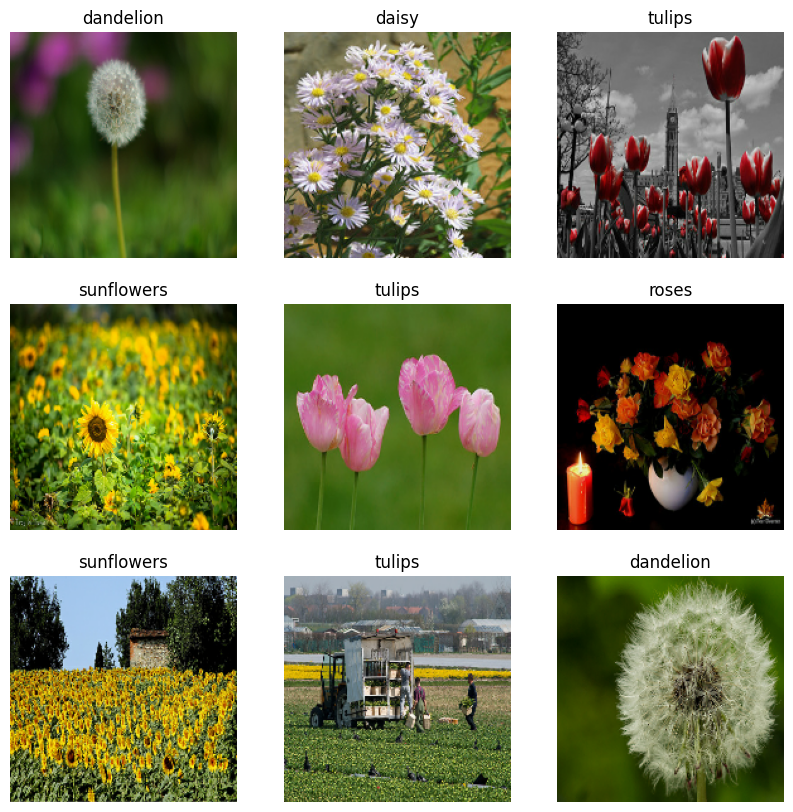

In [40]:
image_batch, label_batch = next(iter(train_dataset))

plt.figure(figsize=(10, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))
    
    label = label_batch[i]
    plt.title(class_names[label])
    
    plt.axis("off")
    # break

## Create NN Model

In [41]:
len(class_names)

5

In [46]:
num_classes = len(class_names)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1./255),
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
    
])

In [54]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 178, 178, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 89, 89, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 87, 87, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 43, 43, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 41, 41, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 20, 20, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 12800)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       1,638,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,975,697 (18.98 MB)

 Trainable params: 1,658,565 (6.33 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,317,132 (12.65 MB)

In [49]:
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']
             )

In [51]:
history = model.fit(train_dataset,
                    validation_data=validation_dataset,
                    epochs=3)

Epoch 1/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 28s 292ms/step - accuracy: 0.5164 - loss: 1.1595 - val_accuracy: 0.5341 - val_loss: 1.1219
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 261ms/step - accuracy: 0.5957 - loss: 1.0074 - val_accuracy: 0.6117 - val_loss: 0.9710
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 24s 263ms/step - accuracy: 0.6603 - loss: 0.8510 - val_accuracy: 0.6322 - val_loss: 0.9480


In [52]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

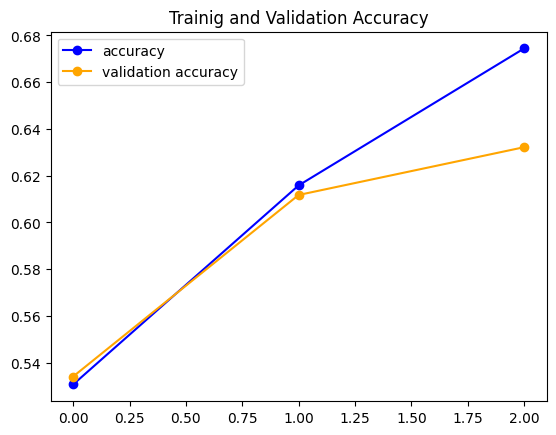

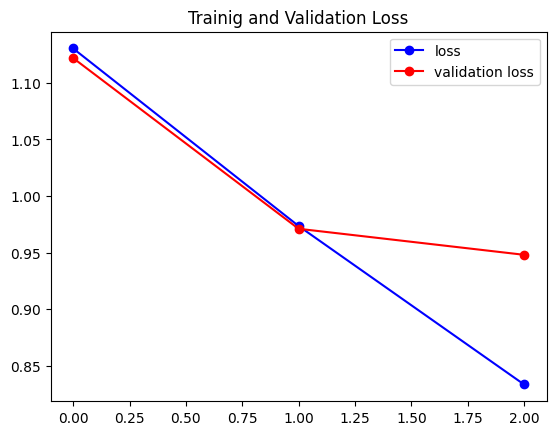

In [53]:
plt.plot(history.history['accuracy'], marker='o', color='blue',label='accuracy')
plt.plot(history.history['val_accuracy'], marker='o' ,color='orange' ,label='validation accuracy')
plt.title('Trainig and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(history.history['loss'],  marker='o', color='blue',label='loss')
plt.plot(history.history['val_loss'],  marker='o', color='red',label='validation loss')
plt.title('Trainig and Validation Loss')
plt.legend()